<a href="https://colab.research.google.com/github/AlexandraLJones/FIRE-CloudComputing/blob/main/Team_Chocolate_FIRE198WrittenReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FIRE 198 Final Report  
##Analyzing the GLOBE Clouds Dataset Using PCA and K-Means Models
### Eesha Kaul, Greg Roden, Zainab Siddique, John Lauterbach 
#### Dates Modified: 04/22/2021 - 05/03/2021


#Introduction




*   Our topic is analyzing and understanding the effectiveness of PCA, or Primary Component Analysis, when creating K-Means Models, and identifying cloud images from the GLOBE Clouds dataset. 
*   We would like to analyze the importance and efficacy of using PCA, and if there are any differences in modeling the clusters that are produced by a K-Means Model. The clustering of this dataset, GLOBE Clouds, identifies the meaningfulness and usefulness of the data. This particular dataset is composed of images of clouds taken by individuals in the public from all over the world. They have been identified by the user and cross-checked with data from NASA to determine the accuracy of the identification . 

*   The dataset we are using is composed of 1,984 images of clouds that are classified into 10 different types based on different features. In Huertas-Tato et al., 2017, 19 features were compiled using a ceilometer and a ground camera to classify images of clouds. We would like to use 11 of those 19 features within our deliverable, using data from the GLOBE Clouds dataset, to test the efficacy of PCA vs Non-PCA clustering in the models. While we are not using the data or images from this scholarly article, we would like to perform similar analysis using the selected features in our PCA.  Within our PCA, we will be able to determine the features that compose 95% variance and analyze the clustering efficiency when we create models that only utilize those features. 

*   Looking at a larger picture, being able to identify the variance and similarities of the features will allow us to better train machine learning algorithms and better identify images, no matter if they are images of clouds or random images. Having algorithms to identify these features in a more efficient way can only improve technology and the research that is being done with the GLOBE Clouds dataset, as well as other datasets. 





#Dependencies

Down below, we have included the packages we are using to create the final product and using to complete the PCA analysis, amongst other data analysis. We have included specifics about each pacakage and import in comments throughout the code cell. 







In [ ]:
#Import data from google drive and needed packages

#Allowing access to the google drive, where are files and images are kept 
from google.colab import drive
import os

#Numpy is a library that allows us to create arrays and matrices, as well as allowing us to perform specific functions relating to arrays/matrices 
import numpy as np 

#Importing these libraries so we can create our features, greycomatrix refers to specific analysis for Energy, Correlation, Contrast, Homogeneity 
from PIL import Image
import shutil
from skimage.feature import greycomatrix, greycoprops

#MinMaxScaler is used to preserve the shape of the original distribution while refitting the data to fit on our future plots
from sklearn.preprocessing import MinMaxScaler 

#To create the K-Means plot, we must import certain packages to be able to plot and display 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#For PCA and determining feature importance
from sklearn.decomposition import PCA
import pandas as pd

#Metrics provides methods of Clustering Test like Silhoutte Score
from sklearn import metrics

#Connects Google Drive to notebook
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


#Data
We utilized the GLOBES Cloud dataset. The data was from the GLOBE Observations folder in the FIRE-CC shared drive. We copied it to our group folder. Then, we had used all observations in our data so there weren’t any specific characteristics that we chose out for them to have.


## Copying Images: (Eesha)

We created a code cell that is used to copy images from the class folders into our group's folder. Each cloud type has its own folder in our shared drive that was created before this code segment was ran. It has been commented out to prevent duplicates in cloud images.

In [ ]:
#Each folder contains images that have been classified as certain cloud types 

#altocumulus_folder = os.listdir('/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Altocumulus')
#altostratus_folder = os.listdir('/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Altostratus')
#cirrocumulus_folder = os.listdir('/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Cirrocumulus')
#cirrostratus_folder = os.listdir('/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Cirrostratus')
#cirrus_folder = os.listdir('/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Cirrus')
#cumulonimbus_folder = os.listdir('/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Cumulonimbus')
#cumulus_folder = os.listdir('/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Cumulus')
#nimbostratus_folder = os.listdir('/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Nimbostratus')
#stratocumulus_folder = os.listdir('/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Stratocumulus')
#stratus_folder = os.listdir('/content/gdrive/Shared drives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Stratus')

#for x in altocumulus_folder :
 #shutil.copy("/content/gdrive/Shareddrives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Altocumulus/"+x ,"/content/gdrive/Shareddrives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/Altocumulus") 
#for x in altostratus_folder :
 # shutil.copy("/content/gdrive/Shareddrives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Altostratus/"+x , "/content/gdrive/Shareddrives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/Altostratus")
#for x in cirrocumulus_folder :
  #shutil.copy("/content/gdrive/Shareddrives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Cirrocumulus/"+x,"/content/gdrive/Shareddrives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/Cirrocumulus")
#for x in cirrostratus_folder :
  #shutil.copy("/content/gdrive/Shareddrives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Cirrostratus/"+x , "/content/gdrive/Shareddrives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/Cirrostratus")
#for x in cirrus_folder :
  #shutil.copy("/content/gdrive/Shareddrives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Cirrus/"+x , "/content/gdrive/Shareddrives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/Cirrus")
#for x in cumulonimbus_folder :
  #shutil.copy("/content/gdrive/Shareddrives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Cumulonimbus/"+x , "/content/gdrive/Shareddrives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/Cumulonimbus")
#for x in cumulus_folder :
  #shutil.copy("/content/gdrive/Shareddrives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Cumulus/"+x, "/content/gdrive/Shareddrives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/Cumulus")
#for x in nimbostratus_folder :
  #shutil.copy("/content/gdrive/Shareddrives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Nimbostratus/"+x, "/content/gdrive/Shareddrives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/Nimbostratus")
#for x in stratocumulus_folder :
  #shutil.copy("/content/gdrive/Shareddrives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Stratocumulus/"+x, "/content/gdrive/Shareddrives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/Stratocumulus")
#for x in stratus_folder :
 #shutil.copy("/content/gdrive/Shareddrives/FIRE-CC/GLOBE Observations/Cloud Images Sorted By Category/Stratus/"+x , "/content/gdrive/Shareddrives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/Stratus")

#Methods


Here, we've performed a series of functions that processes the features of the images. The functions that are being performed will produce specific features of the images in the GLOBE Clouds dataset. We have stored the features in a 2-D Array and have saved the block of code, "Calculate_image_features," into a file to save time and be efficient while running other aspects of the project. 

## Image Feature Processes: (Greg)

We created the BlueDeviation function to calculate the blue deviation of each image in the folders. To do this, we created a variable, temp, that represents the average blue values found in the image divided by the size of the array. Essentially, we are calculating the standard deviation. 

In [ ]:
#Using the BlueDeviation function, we can determine what the blue deviation is of each image in the folders 
def BlueDeviation(array, color_avg) :
  temp =( (array[:,:,2] - color_avg) ** 2)
  return (temp.sum() /temp.size)

We created the BlueSkewness Function, which was used to calculate the skewness of the blue pixels in the images. To do this, we created a variable, temp1, which was used to return the asymmetry or distortion of the standard deviation (here, blue deviation). 

In [ ]:
#Using the BlueSkewness function, we can determine the blue skewness of each image in the folders 
def Blueskewness(array,color_ind,color_avg, color_dev):
  temp1=((array[:,:,color_ind]-color_avg)/color_dev)**3
  return temp1.sum() / temp1.size

Below, we have created an array which contains the images found in the specific folders. We performed the following functions on 1,984 images. The array_all_features contains all the features (11 total) that we found and included in our analysis. Within this code cell, we have calculated the following properties/features: Red Average, Blue Average, Blue Deviation, Blue Skewness, Red-Green Average Difference, Red-Blue Average Difference, Green-Blue Average Difference, as well as utilizing analysis with GLCM and calculating these features: Correlation, Energy, Contrast, Homogeneity. 

To store these features, we created a zero-filled array to contain the 11 features. Additionally, we created a GLCM array for the GLCM features. 

We appended the image features to the total image array, represented by this line: array_all_features.append(imageAttributes)

To avoid recomputing the features everytime we run the notebook, we have saved the final array created by this block of code into a file. This step will help us save time and will allow us to be more efficient with our algorithms and the creation of our final product. 

In [ ]:
def Calculate_image_features():
  array_all_features = []
  cloud_types = ['Altocumulus', 'Altostratus', 'Cirrocumulus', 'Cirrostratus', 'Cirrus', 'Cumulonimbus', 'Cumulus', 'Nimbostratus', 'Stratocumulus', 'Stratus']
  row = 0
  for filepath in cloud_types:
    folder_path = '/content/gdrive/Shared drives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/' + filepath
    var = os.listdir(folder_path)
    for images in var:
      image = Image.open('/content/gdrive/Shared drives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/' + filepath + '/' + images)
      image_array = np.array(image)
      #Creates an zero-filled array for eleven features
      imageAttributes = np.zeros(11)
      #Red Average
      imageAttributes[0] = np.average(image_array[:,:,0])
      #Blue Average
      imageAttributes[1] = np.average(image_array[:,:,2])
      #Blue Deviation
      imageAttributes[2] = BlueDeviation(image_array, imageAttributes[1])
      #Blue Skewness
      imageAttributes[3] = Blueskewness(image_array, 2, imageAttributes[1], imageAttributes[2]) 
      #Red-Green Average Difference
      imageAttributes[4] = np.average(image_array[:,:,0]) - np.average(image_array[:,:,1])
      #Red-Blue Average Difference
      imageAttributes[5] = np.average(image_array[:,:,0]) - np.average(image_array[:,:,2])
      #Green-Blue Average Difference
      imageAttributes[6] = np.average(image_array[:,:,1]) - np.average(image_array[:,:,2])
      #Creation of GLCM for GLCM Features
      glcm = greycomatrix(image_array[:,:,2], [1], [0])
      #Energy
      imageAttributes[7] = greycoprops(glcm, 'energy')
      #Correlation
      imageAttributes[8] = greycoprops(glcm, 'correlation')
      #Contrast
      imageAttributes[9] = greycoprops(glcm, 'contrast')
      #Homogeneity
      imageAttributes[10] = greycoprops(glcm, 'homogeneity')
      #Adds Image Features to the total image array
      array_all_features.append(imageAttributes)
      row = row + 1
  return array_all_features

#array_all_features = Calculate_image_features()
#np.save('/content/gdrive/Shared drives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/features.npy',array_all_features)

# Loading data

To cut down on runtime, we saved the feature array in our shared drive. Here we are loading that array to be used in our models.

In [ ]:
#Grabs feature array in our shared drive
data = np.load('/content/gdrive/Shared drives/FIRE-CC/FIRE198/Summative Projects Team Folders/Chocolate/features.npy')

## Scaling: (Zainab)

Moving forward, we wanted to be able to plot our data and calculations from above cells. In order to do this, we scaled the data to fit on our plots. First, we imported MinMaxScaler, which subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution. By utilizing MinMaxScaler, we can maintain the shape of our data while fitting everything appropriatly to our plots. 

In [ ]:
#Uses MinMaxScaler to fit and transform the data (the features plotted on the plot)
arr = MinMaxScaler().fit_transform(data) 

# Creation of K-means: (Zainab)

Here, we will be creating one of our main objectives, a K-Means model that uses all 11 features in the dataset.

The K-means fit function, when passed the full feature array, assigns cluster labels to each image. These labels will be used later to test cluster strength.

To ensure that the method works, we print the size of label array (should be 1984 for our dataset) and the array itself.

In [ ]:
#Creation of K-means with 10 clusters for each cloud type
non_pca_kmeans = KMeans(n_clusters=10)

#K-means model with every image and every feature
non_pca_kmeans.fit(arr[:,:])

#Prints length and each cluster label for each image
print(len(non_pca_kmeans.labels_))
print(non_pca_kmeans.labels_)

1984
[1 1 0 ... 8 7 8]


# PCA

## PCA analysis: (John)

Below, we have performed analysis using PCA or Principal Component Analysis. These components include the features that were computed above, but in a new rearranged order that provides us with more information, mainly which features have the most variance. We preformed this analysis on the 11 features. 

The PCA calculates the features that have the most variance. The PCA, when given our features, naturally sorts the features from most to least variance. For example, Red Average was placed as the last feature in the array, meaning it has the least variance. In the context of our dataset this is expected, since there is not much red found in the images of blue/gray skies and white/gray clouds.

To complete the PCA analysis, we created a bar graph that plots the features based on the variance percentages of each feature. We can see below that Green-Blue Average Difference, Homogeneity, Blue Average, Blue Deviation, and Correlation have the most variance (Loukas). By running a summative method on the PCA explained variance ratio, we found that those features represent ~95% of the variance. Again, in the context of our dataset, this is expected as the images contain high amounts of blue in them and vary based on the cloud type.

       0                1
0    PC0  Green-Blue Diff
1    PC1      Homogeneity
2    PC2     Blue Average
3    PC3   Blue Deviation
4    PC4      Correlation
5    PC5   Red-Green Diff
6    PC6           Energy
7    PC7    Blue Skewness
8    PC8         Contrast
9    PC9    Red-Blue Diff
10  PC10      Red Average


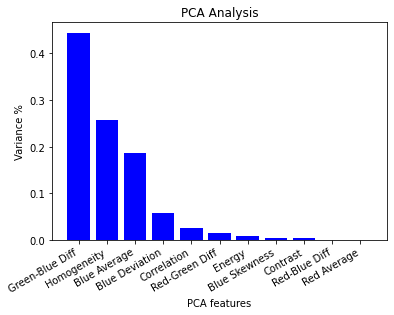

In [ ]:
#Creation of PCA, and passing of feature array
pca = PCA(n_components = 11)
p_components = pca.fit_transform(arr)

#Finds which features has the most variance in the PCA
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['Red Average','Blue Average','Blue Deviation','Blue Skewness','Red-Green Diff','Red-Blue Diff','Green-Blue Diff','Energy','Correlation','Contrast','Homogeneity']

#Creation of PCA dictionary in sorted order
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())

#Creation of Bar graph, which plots the features based on the percentage of feature variance
plt.bar(most_important_names, pca.explained_variance_ratio_, color='blue')
plt.title('PCA Analysis')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(most_important_names, rotation=30, ha='right')

#Prints the ranking chart of which features have the most to least variance
print(df)

Using the code provided by Dr. Jones, the calculations below provide us with information regarding which features have at least 95% of variance. 

[0.44469326 0.70127598 0.88723016 0.94371158 0.96994831 0.98461555
 0.99369682 0.99702736 1.         1.         1.        ]


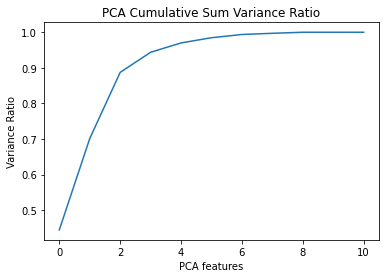

In [ ]:
#CODE ADDED BY DR. JONES

#Creation of Cumulative Sum Graph
plt.plot(np.cumsum((pca.explained_variance_ratio_)))
plt.title('PCA Cumulative Sum Variance Ratio')
plt.xlabel('PCA features')
plt.ylabel('Variance Ratio')

#Prints Feature variance ratios
print(np.cumsum((pca.explained_variance_ratio_)))

As you can see above in order to reach over 95% of variance we must include PCA features 0 through 5. Of the original features we configured, the features that are included are: Green-Blue Difference, Homogeneity, Blue Average, Blue Deviation, and Correlation.

## PCA K-means: (John)

Earlier in the notebook, we configured a K-Means model that represents the features before we performed the PCA. Here, we'll only use the data that the PCA found to be the most important. For ~95% variance, we found that the K-means model should be passed the first five features.

Using the same methodology as we did above to create a K-Means model, we pass the fit function the first five features of our PCA dataset.

Again, to ensure that the model is working, we print out the length of the label array and the labels.

In [ ]:
#Creation of K-means with 10 clusters for each cloud type
pca_kmeans = KMeans(n_clusters=10)

#Fits data using first 5 features
pca_kmeans.fit(p_components[:,:5])

#Prints each cluster label for each image
print(len(pca_kmeans.labels_))
print(pca_kmeans.labels_)

1984
[7 7 3 ... 9 5 9]


# Clustering Test: (Greg)

Finally, we must see which K-Means model (PCA vs Non-PCA) was able to configure and plot the data more effectively into clusters. One way we did this was through Silhouette Score and the Harabasz Score.

The Silhouette Score is used to see the density and distance between each plotted point on the model. As the score approaches 1, the cluster is dense and well-separated than other clusters. If the value is near 0, it represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. (Kumar, 2020) 

The Calinski-Harabasz Score, or just Harabasz Score, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters. In other words: the higher the score, the better the performances. (Wei, 2020) 

Feature array compared to Non-PCA K-means labels:

In [ ]:
print("Silhouette Score:")
print(metrics.silhouette_score(arr[:,:], non_pca_kmeans.labels_))
print("Harabasz Score:")
print(metrics.calinski_harabasz_score(arr[:,:], non_pca_kmeans.labels_))

Silhouette Score:
0.21711309764153353
Harabasz Score:
508.53609090037077


Feature array compared to PCA K-means labels:

In [ ]:
print("Silhouette Score:")
print(metrics.silhouette_score(arr[:,:], pca_kmeans.labels_))
print("Harabasz Score:")
print(metrics.calinski_harabasz_score(arr[:,:], pca_kmeans.labels_))

Silhouette Score:
0.2189524345079256
Harabasz Score:
507.82944111474524


Notice how the PCA dataset proved to have almost equal Silhouette and Calinski-Harabasz scores with the full dataset. Keep in mind that the PCA dataset only used 5 of the original features instead of all 11.

Additionally, we can check the *inertia* of the models. Inertia refers to the how internally coherent the clusters are, and lower Inertia scores means better clustering. One of the drawbacks of using Inertia to measure cluster strength is that more features produces worse Inertia scores. So it can be inferred that the PCA K-means model will provide better results due to less features being involved. (Pedregosa)

In [ ]:
print("Non-PCA K-means:")
print(non_pca_kmeans.inertia_)
print("PCA K-means:")
print(pca_kmeans.inertia_)

Non-PCA K-means:
75.67723090242248
PCA K-means:
68.36725788873414


As seen above the results are just as we expected; The inertia for the PCA K-means was lower than the Non-PCA K-means. This provides further evidence that the PCA K-means produced better clustering.

# Additional Visualizations

In this section we wanted to create additional visualizations of the K-means model. We chose the first two features with the most variance, as discovered by our PCA analysis, to graph because of their importance. Additionally,  we created 3D graphs to include visuals of K-means clustering. These graphs did not impact our conclusion, since we cannot graph each feature at the same time. These are merely to give anyone who hasn't seen K-means clustering a visual and to give further evidence on why certain features were used. 

*Note that 'Strong' and 'Weak' refer to how clear the features chosen produce differentiatable clusters. See PCA Analysis for an in order rank of features.*

Non-PCA K-means with strong features:

Text(0, 0.5, 'Homogeneity')

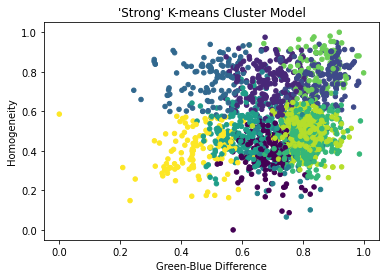

In [ ]:
#Creates Graph
plt.scatter(arr[:,6], arr[:,10], c=non_pca_kmeans.labels_, s=20, cmap='viridis')

plt.title('\'Strong\' K-means Cluster Model')

#Representing the x-axis 
plt.xlabel('Green-Blue Difference') 

#Representing the y-axis 
plt.ylabel('Homogeneity') 

Non-PCA Kmeans with weak features:

Text(0, 0.5, 'Red-Blue Difference')

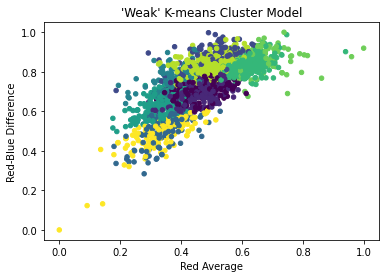

In [ ]:
#Creates Graph
plt.scatter(arr[:,0], arr[:,5], c=non_pca_kmeans.labels_, s=20, cmap='viridis')

plt.title('\'Weak\' K-means Cluster Model')

#Representing the x-axis 
plt.xlabel('Red Average') 

#Representing the y-axis 
plt.ylabel('Red-Blue Difference') 

As you can see above, graphing the features with the strongest variance provides clearer clusters. However, graphing using the weakest features provides lots of overlap between clusters. This gives an insight on the difference in variance between each features. 

These features will provide us with more useful information about cloud type because we can differentiate between clusters. However, if we use the "weak" features, it would be less effective at identifying the cloud types since the clusters are overlapping due to a lack of variance.

PCA Kmeans using strong features:

Text(0, 0.5, 'Homogeneity')

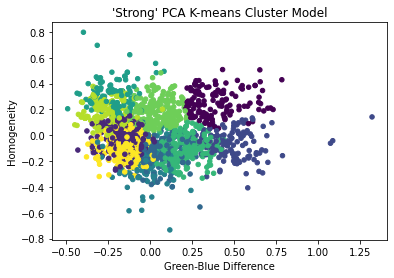

In [ ]:
#Creates Graph
plt.scatter(p_components[:,0], p_components[:,1], c=pca_kmeans.labels_, s=20, cmap='viridis')

plt.title('\'Strong\' PCA K-means Cluster Model')

#Representing the x-axis 
plt.xlabel('Green-Blue Difference')

#Representing the y-axis 
plt.ylabel('Homogeneity') 

PCA Kmeans using weak features:

Text(0, 0.5, 'Red-Blue Difference')

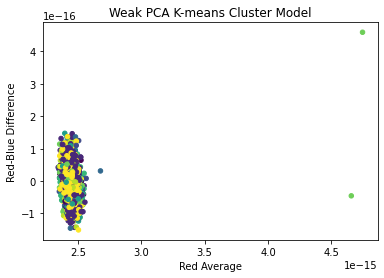

In [ ]:
#Creates Graph
plt.scatter(p_components[:,9], p_components[:,10], c=pca_kmeans.labels_, s=20, cmap='viridis')

plt.title('Weak PCA K-means Cluster Model')

#Representing the x-axis 
plt.xlabel('Red Average')

#Representing the y-axis 
plt.ylabel('Red-Blue Difference') 

As seen above, the weakest features of the PCA produces clusters that are tightly packed, but overlapping each other. Using these features in the model would make differtiating between cloud types impossible. 

*Also note potential outliers that could affect a cloud type model using our features and data.*

In addition to the 2-D plots above, our team worked on creating visual aids for a 3-D plot that displays the difference of weak and strong clustering using a few of the PCA features. We can clearly see a difference in the clustering of each model. The "weak" PCA model provides clusters that are overlapping and tightly packed towards one side. We can see that it is more effective to use the "strong" PCA to demonstrate better clustering that is not overlapping, tightly packed, or unevenly spaced. 

Text(0.5, 0, 'Blue Average')

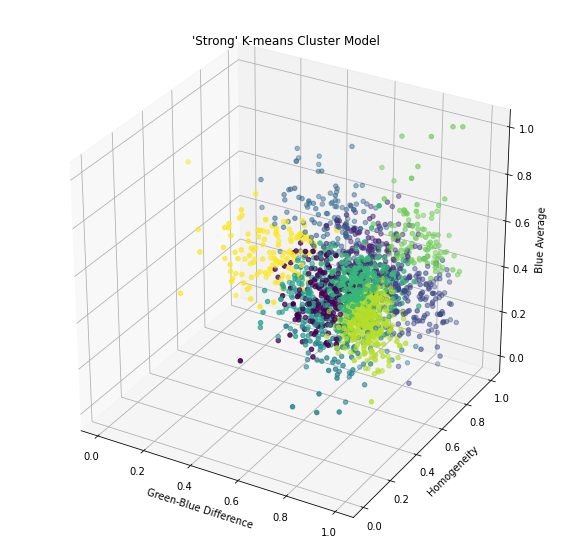

In [ ]:
#Creates 3D Graph
plt.figure(figsize=(10,10))
ax = plt.axes(projection ="3d")
ax.scatter(arr[:,6], arr[:,10], arr[:,1], c = non_pca_kmeans.labels_, s=20, cmap='viridis')

#Title of the K-Means Model, and names of axes
plt.title('\'Strong\' K-means Cluster Model')

#Representing the x-axis 
plt.xlabel('Green-Blue Difference')

#Representing the y-axis 
plt.ylabel('Homogeneity')

#Representing the z-axis 
ax.set_zlabel('Blue Average')

Text(0.5, 0, 'Blue Average')

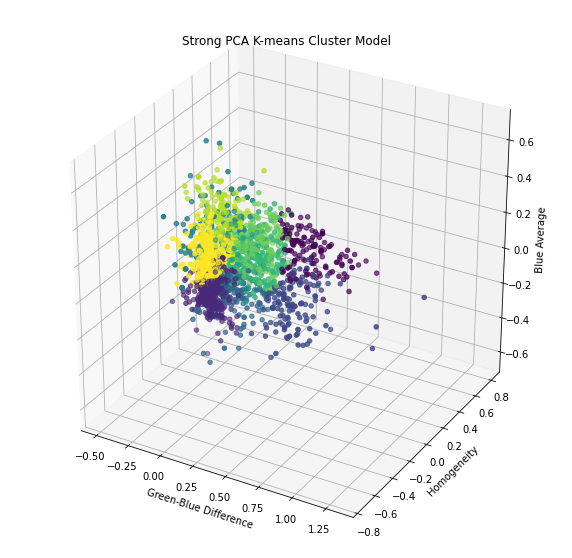

In [ ]:
#Creates 3D Graph
plt.figure(figsize=(10,10))
ax = plt.axes(projection ="3d")
ax.scatter(p_components[:,0], p_components[:,1], p_components[:,2], c = pca_kmeans.labels_, s=20, cmap='viridis')

#Title of the K-Means Model, and names of axes
plt.title('Strong PCA K-means Cluster Model')

#Representing the x-axis 
plt.xlabel('Green-Blue Difference')

#Representing the y-axis 
plt.ylabel('Homogeneity')

#Representing the z-axis 
ax.set_zlabel('Blue Average')

#Conclusions
We were able to complete our main goals. We determined which features contributed to the most variance; Analyzed how effective the clustering was for each model with the Silhouette and Harabasz scores, as well as testing with Inertia; and created graphs of the k-means models showing them with and without PCA and using strong and weak features.

From doing the PCA analysis, we were able to determine which features are the most useful. We determined that the features with the most variance were: Green-Blue Difference, Homogeneity, Blue Deviation, Correlation, and Blue Average. In the creation of our second Kmeans model, we used these 5 features because they contribute to ~95% variance. According to our clustering tests, we determined that using the PCA Kmeans provided nearly equally effective clustering with less features. Additionally, the PCA Kmeans performed better in terms of Inertia against the Non-PCA Kmeans.
 
If we can utilize and calculate less features to produce similar results, we can see that using PCA is effective in simplifying the amount of work that needs to be done. We can have fast computing but reliable algorithms using PCA. Moving forward, we wondered what else could be done to make the PCA clustering even better, in terms of their spacing, the centers of the clusters, etc.


#Bibliography
3D Scatter Plotting in Python using Matplotlib. GeeksforGeeks. (2020, September 28). https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/. 

Huertas-Tato, J., Rodríguez-Benítez, F. J., Arbizu-Barrena, C., Aler-Mur, R., Galvan-Leon, I., & Pozo-Vázquez, D. (2017). Automatic cloud-type classification based on the combined use of a SKY camera and A ceilometer. Journal of Geophysical Research: Atmospheres, 122(20). https://doi.org/10.1002/2017jd027131

Kumar, A. (2020, September 17). KMeans Silhouette Score Explained With Python Example - DZone AI. dzone.com. https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam. 

Loukas, S. (2018, June 11). Feature/Variable importance after a PCA analysis. Stack Overflow. https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis

Pedregosa et al. (2011). 2.3. Clustering — scikit-learn 0.24.2 documentation. 2.3 Clustering. https://scikit-learn.org/stable/modules/clustering.html

Tripathi, A. (2020, September 16). A Complete Guide to Principal Component Analysis — PCA in Machine Learning. Medium. https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a

Wei, H. (2020, January 2). How to measure clustering performances when there are no ground truth? Medium. https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c#:~:text=The%20Calinski%2DHarabasz%20index%20also,score%20%2C%20the%20better%20the%20performances. 
